# Importing libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

from sklearn.neural_network import MLPRegressor

## Image save location
import os
save_path = r'C:\Users\hp envy\Desktop\UConn\OPIM 5512 - Data Science with Python\A02-prk23006-yhi24001\figs'

# Loading Data and EDA

In [2]:
# Load California Housing dataset
housing = fetch_california_housing(as_frame=True)

# Features + target as a single DataFrame
df = housing.frame

###### EDA Plots

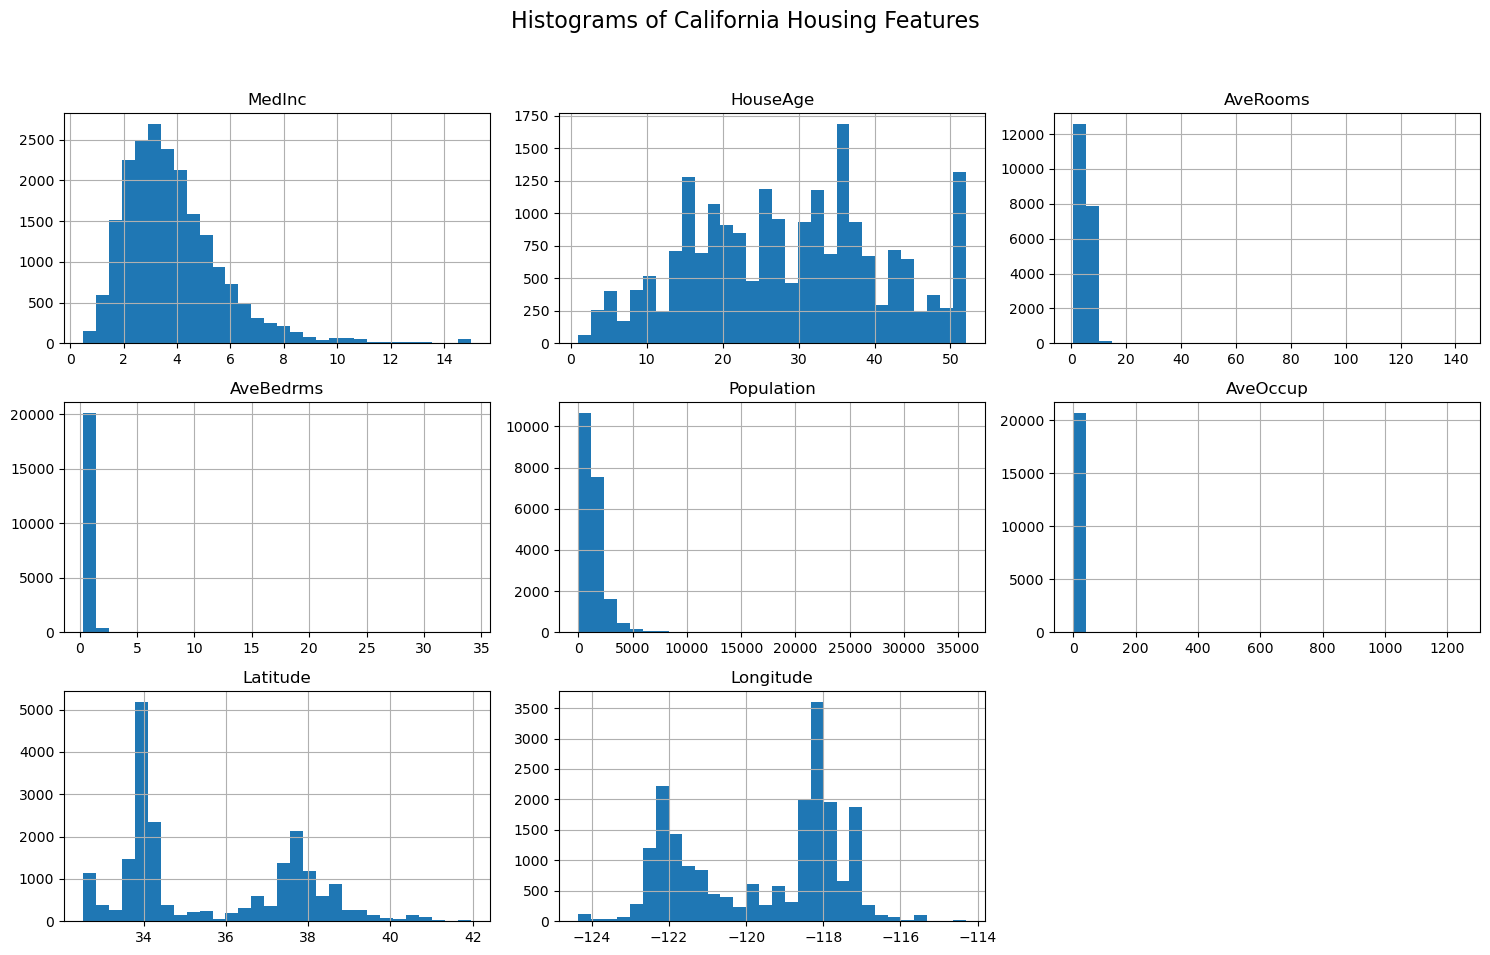

<Figure size 640x480 with 0 Axes>

In [3]:
df.drop('MedHouseVal', axis=1).hist(figsize=(15, 10), bins=30)
plt.suptitle('Histograms of California Housing Features', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

plt.savefig(os.path.join(save_path, "histogram.png"), bbox_inches='tight')


# Spliting Data

In [4]:
# X y Split
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Train - Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the Data

In [5]:
columns_to_scale = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']
columns_to_not_scale = ['Latitude', 'Longitude']
scaler = MinMaxScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), columns_to_scale),
        ('passthrough', 'passthrough', columns_to_not_scale)
    ])

X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# Model Training & Fitting

In [6]:
model = MLPRegressor(
    hidden_layer_sizes=(16, 8),
    learning_rate_init=0.01, # Customised Hyperparameter,
    max_iter=1000,
    random_state=67,
    early_stopping=True
    )

model.fit(X_train_scaled, y_train)
 
y_test_pred=model.predict(X_test_scaled)
y_train_pred=model.predict(X_train_scaled)
 

# Model Evaluation

###### Model is definitely struggling with the outliers and not able to fully generalise

###### RMSE and MAPE

In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(y_test, y_test_pred)**0.5
print(f"Root Mean Squared Error: {mse}")

mape = mean_absolute_error(y_test, y_test_pred)
print(f"Mean Absolute Percentage Error: {mape}")

Root Mean Squared Error: 0.7606655927760552
Mean Absolute Percentage Error: 0.5599452631122102


###### Plot Actual vs Predicted - Train

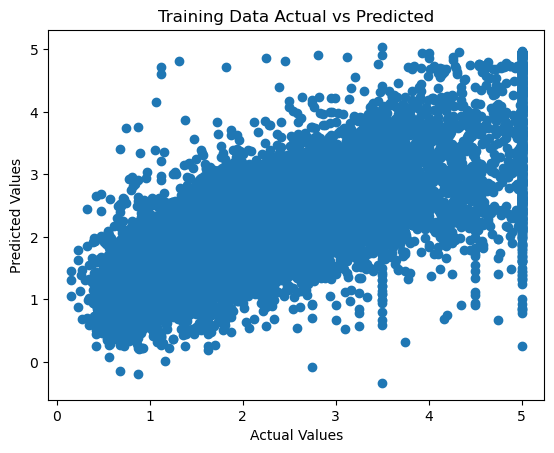

<Figure size 640x480 with 0 Axes>

In [8]:
plt.scatter(y_train, y_train_pred)
plt.title('Training Data Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

plt.savefig(os.path.join(save_path, "train_act_vs_pred.png"), bbox_inches='tight')


###### Plot Actual vs Predicted - Test

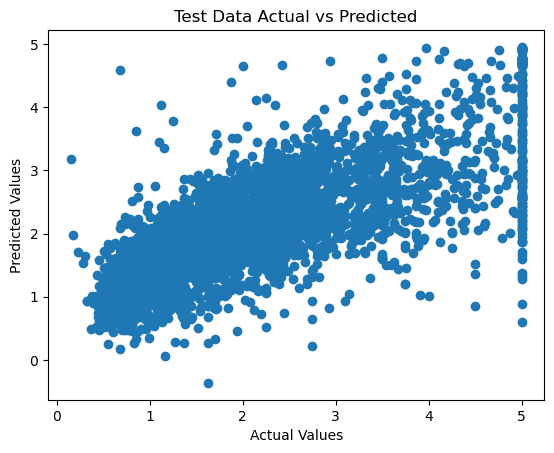

<Figure size 640x480 with 0 Axes>

In [9]:
plt.scatter(y_test, y_test_pred)
plt.title('Test Data Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()
plt.savefig(os.path.join(save_path, "test_act_vs_pred.png"), bbox_inches='tight')
